In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('zomato.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


<Axes: ylabel='Close'>

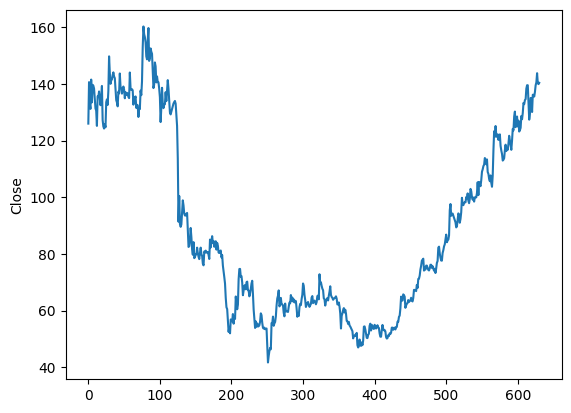

In [51]:
sns.lineplot(df['Close'])

<Axes: ylabel='Volume'>

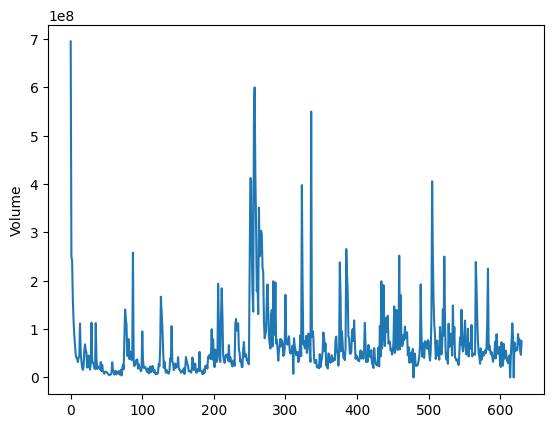

In [52]:
sns.lineplot(df['Volume'])

In [53]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head(5)

,Open,High,Low,Close,Volume
0,116.000000,138.899994,115.000000,126.000000,694895290
1,126.349998,143.750000,125.300003,140.649994,249723854
2,141.699997,147.800003,127.750000,132.899994,240341900
3,131.000000,135.000000,123.550003,131.199997,159793731
4,134.949997,144.000000,132.199997,141.550003,117973089


In [54]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


**Classification Model**

---








In [55]:
df['Y'] = np.where(df['Close'].shift(-1)>df['Close'],1,0)
df.head(5)

,Open,High,Low,Close,Volume,Y
0,116.000000,138.899994,115.000000,126.000000,694895290,1
1,126.349998,143.750000,125.300003,140.649994,249723854,0
2,141.699997,147.800003,127.750000,132.899994,240341900,0
3,131.000000,135.000000,123.550003,131.199997,159793731,1
4,134.949997,144.000000,132.199997,141.550003,117973089,0


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])
df.head(5)


,Open,High,Low,Close,Volume,Y
0,0.624688,0.758427,0.654641,0.710914,1.000000,1
1,0.710723,0.797352,0.745271,0.834387,0.359369,0
2,0.838321,0.829856,0.766828,0.769069,0.345868,0
3,0.749377,0.727127,0.729872,0.754741,0.229954,1
4,0.782211,0.799358,0.805983,0.841972,0.169771,0


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Y',axis=1),df['Y'],test_size=0.1)
x_train

,Open,High,Low,Close,Volume
232,0.148795,0.136838,0.142983,0.131901,0.139525
16,0.794264,0.742376,0.806423,0.786346,0.029221
433,0.121779,0.096308,0.124065,0.120944,0.062294
599,0.745636,0.695024,0.745271,0.731985,0.090825
162,0.302161,0.301766,0.318522,0.330383,0.049562
...,...,...,...,...,...
303,0.206151,0.176966,0.197536,0.186262,0.097568
554,0.595594,0.560193,0.623845,0.608512,0.079655
155,0.319202,0.290530,0.325561,0.307627,0.017818
309,0.173317,0.141252,0.178179,0.165613,0.082765


In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model = keras.Sequential([
    keras.layers.Dense(200,input_shape = (5,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation = 'relu'),
     keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4743 - loss: 0.6938
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5210 - loss: 0.6932 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 0.6931 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4248 - loss: 0.6960 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5063 - loss: 0.6923 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5243 - loss: 0.6927 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5694 - loss: 0.6914 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4284 - loss: 0.6964 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5377 - loss: 0.6914 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5002 - loss: 0.6937 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 0.6922 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [61]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6887 


[0.68830406665802, 0.578125]

**Regression Model**

---



In [62]:
df['Y_reg'] = df['Close'].shift(-1)
df.head(5)
df = df.dropna()
df.head(5)

,Open,High,Low,Close,Volume,Y,Y_reg
0,0.624688,0.758427,0.654641,0.710914,1.000000,1,0.834387
1,0.710723,0.797352,0.745271,0.834387,0.359369,0,0.769069
2,0.838321,0.829856,0.766828,0.769069,0.345868,0,0.754741
3,0.749377,0.727127,0.729872,0.754741,0.229954,1,0.841972
4,0.782211,0.799358,0.805983,0.841972,0.169771,0,0.774126


In [63]:
df = df.drop('Y',axis=1)
df.head(5)


,Open,High,Low,Close,Volume,Y_reg
0,0.624688,0.758427,0.654641,0.710914,1.000000,0.834387
1,0.710723,0.797352,0.745271,0.834387,0.359369,0.769069
2,0.838321,0.829856,0.766828,0.769069,0.345868,0.754741
3,0.749377,0.727127,0.729872,0.754741,0.229954,0.841972
4,0.782211,0.799358,0.805983,0.841972,0.169771,0.774126


In [64]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Y_reg',axis=1),df['Y_reg'],test_size=0.1)
x_train

,Open,High,Low,Close,Volume
176,0.365337,0.327849,0.366476,0.344290,0.013972
278,0.161679,0.131621,0.165420,0.152128,0.101003
548,0.523275,0.488363,0.531456,0.524652,0.077439
14,0.788030,0.746388,0.804663,0.790560,0.073762
321,0.204489,0.185393,0.214694,0.199326,0.125810
...,...,...,...,...,...
102,0.731505,0.709872,0.774307,0.758112,0.029418
4,0.782211,0.799358,0.805983,0.841972,0.169771
338,0.215295,0.196629,0.227893,0.226717,0.138528
336,0.184123,0.179775,0.187418,0.198904,0.791081


In [46]:
model_reg = keras.Sequential([
    keras.layers.Dense(250,input_shape = (5,),activation = 'relu'),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model_reg.compile(optimizer = 'adam', loss = 'mse',metrics = ['mae'])
model_reg.fit(x_train,y_train,epochs = 100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0861 - mae: 0.2065
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0451 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mae: 0.0356 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mae: 0.0366 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0290 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mae: 0.0286 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0269 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - mae: 0.0277
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0295 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0282 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mae: 0.0313 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0299 
Epoch 13/100
18/18 ━━━━━━━━

In [66]:
model_reg.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0045 - mae: 0.0528 


[0.004129144828766584, 0.04971858859062195]